In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
df = pd.read_csv('../input/cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
# 1. Определите количество мужчин и женщин среди испытуемых. Обратите внимание, что способ кодирования переменной gender мы не знаем. 
# Воспользуемся медицинским фактом, а именно: мужчины в среднем выше женщин.
new_df = pd.DataFrame()
new_df['mean_height'] = df.groupby('gender')['height'].mean()
new_df['count'] = df['gender'].value_counts()
new_df
# женщин - 45530
# мужчин - 24470

,mean_height,count
gender,,
1,161.355612,45530
2,169.947895,24470


In [3]:
# 2. Верно ли, что мужчины более склонны к употреблению алкоголя, чем женщины?
pd.crosstab(df['gender'], df['alco'])
# Да, мужчины более склонны к употреблению алкоголя, чем женщины. При меньшем кол-ве мужчин число употребляющих алкоголь - больше.

alco,0,1
gender,,
1,44369,1161
2,21867,2603


In [4]:
# 3. Каково различие между процентами курящих мужчин и женщин?
pd.crosstab(df['gender'], df['smoke'], normalize=True)

smoke,0,1
gender,,
1,0.638814,0.011614
2,0.273057,0.076514


In [5]:
# Процент курящих женщин
df[df['gender'] == 1]['smoke'].sum() / df[df['gender'] == 1].shape[0]

0.017856358444981332

In [6]:
# Процент курящих мужчин
df[df['gender'] == 2]['smoke'].sum() / df[df['gender'] == 1].shape[0]
# Курящие мужчины составляют 7.6% от всех людей и 11.7% от мужчин. Женщины же всего 1.1% от всех людей и 1.7% от женщин. . 

0.117636723039754

In [7]:
# 4. Какова разница между средними значениями возраста для курящих и некурящих?
df['age'] = (df['age'] / 365).round()
df.groupby('smoke')['age'].mean()
# Курящие люди в срднем на 1 год младше, чем некурящие

smoke
0    53.439395
1    52.296645
Name: age, dtype: float64

In [8]:
# 5. Создайте новый признак --- BMI (body mass index, индекс массы тела). Для этого разделите вес в килограммах на квадрат роста в метрах. 
# Считается, что нормальные значения ИМТ составляют от 18.5 до 25. Выберите верные утверждения:

#(a) Средний ИМТ находится в диапазоне нормальных значений ИМТ.
#(b) ИМТ для женщин в среднем выше, чем для мужчин.
#(c) У здоровых людей в среднем более высокий ИМТ, чем у людей с ССЗ.
#(d) Для здоровых непьющих мужчин ИМТ ближе к норме, чем для здоровых непьющих женщин

df['BMI'] = df['weight'] / ((df['height']/100)**2)
df['BMI'].mean()
# Средний BMI - 27.5 т.е. больше нормы

27.55651255127882

In [9]:
df.groupby('gender')['BMI'].mean()
# В среднем BMI для женщин выше, чем для мужчин на 1.2

gender
1    27.987583
2    26.754442
Name: BMI, dtype: float64

In [10]:
df.groupby('cardio')['BMI'].mean()
# В среднем у людей с ССЗ BMI больше на 2, чем у здоровых.

cardio
0    26.548175
1    28.566061
Name: BMI, dtype: float64

In [11]:
df.pivot_table(values=['BMI'], index=['cardio', 'alco', 'gender'], aggfunc='mean')
# BMI ближе к норме у здоровых непьющих мужчин. ,
# Ответ:b,d

BMI
cardio alco gender           
0      0    1       26.845407
            2       25.872638
       1    1       28.671457
            2       26.097220
1      0    1       29.052771
            2       27.522450
       1    1       30.812347
            2       28.226569

In [12]:
# 6. Удалите пациентов, у которых диастолическое давление выше систолического. Какой процент от общего количества пациентов они составляли?
df[df['ap_hi'] < df['ap_lo']].shape[0] / df.shape[0]
# Пациенты у которых диастолическое давление выше систолического - 1.7 % от общего кол-ва пациентов

0.017628571428571427

In [13]:
df.drop(df[df['ap_hi'] < df['ap_lo']].index)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
5,8,60.0,1,151,67.0,120,80,2,2,0,0,0,0,29.384676
6,9,61.0,1,157,93.0,130,80,3,1,0,0,1,0,37.729725
7,12,62.0,2,178,95.0,130,90,3,3,0,0,1,1,29.983588
8,13,48.0,1,158,71.0,110,70,1,1,0,0,1,0,28.440955
9,14,54.0,1,164,68.0,110,60,1,1,0,0,0,0,25.282570


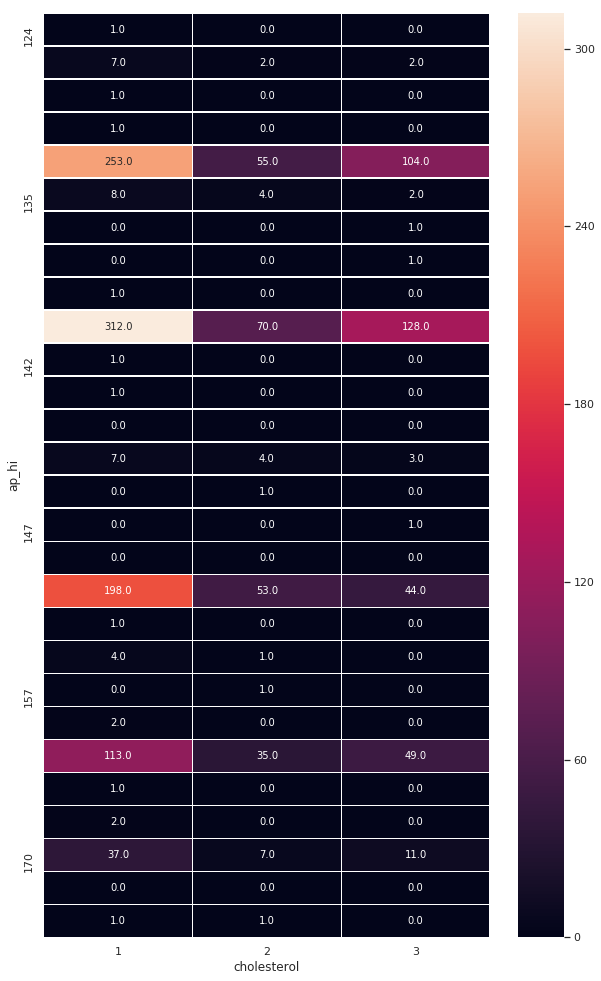

In [14]:
# 7. На сайте Европейского общества кардиологов представлена шкала SCORE. Она используется для расчёта риска смерти от сердечно-сосудистых заболеваний в ближайшие 10 лет.
# Вычислите аналогичное соотношение для наших данных.
platform_genre_sales = df[(df['ap_hi'] > 120) & (df['ap_hi'] < 180) & (df['age'] > 60) & (df['age'] < 65) & (df['gender'] == 2)].pivot_table(
                        index='ap_hi', 
                        columns='cholesterol', 
                        values='cardio', 
                        aggfunc=sum).fillna(0).applymap(float)
f, ax = plt.subplots(figsize=(10, 17))
sns.heatmap(platform_genre_sales, annot=True, linewidths=.5, fmt=".1f", ax=ax, yticklabels=5)
# Двннвя зависимость не сохранилась на наших данных.

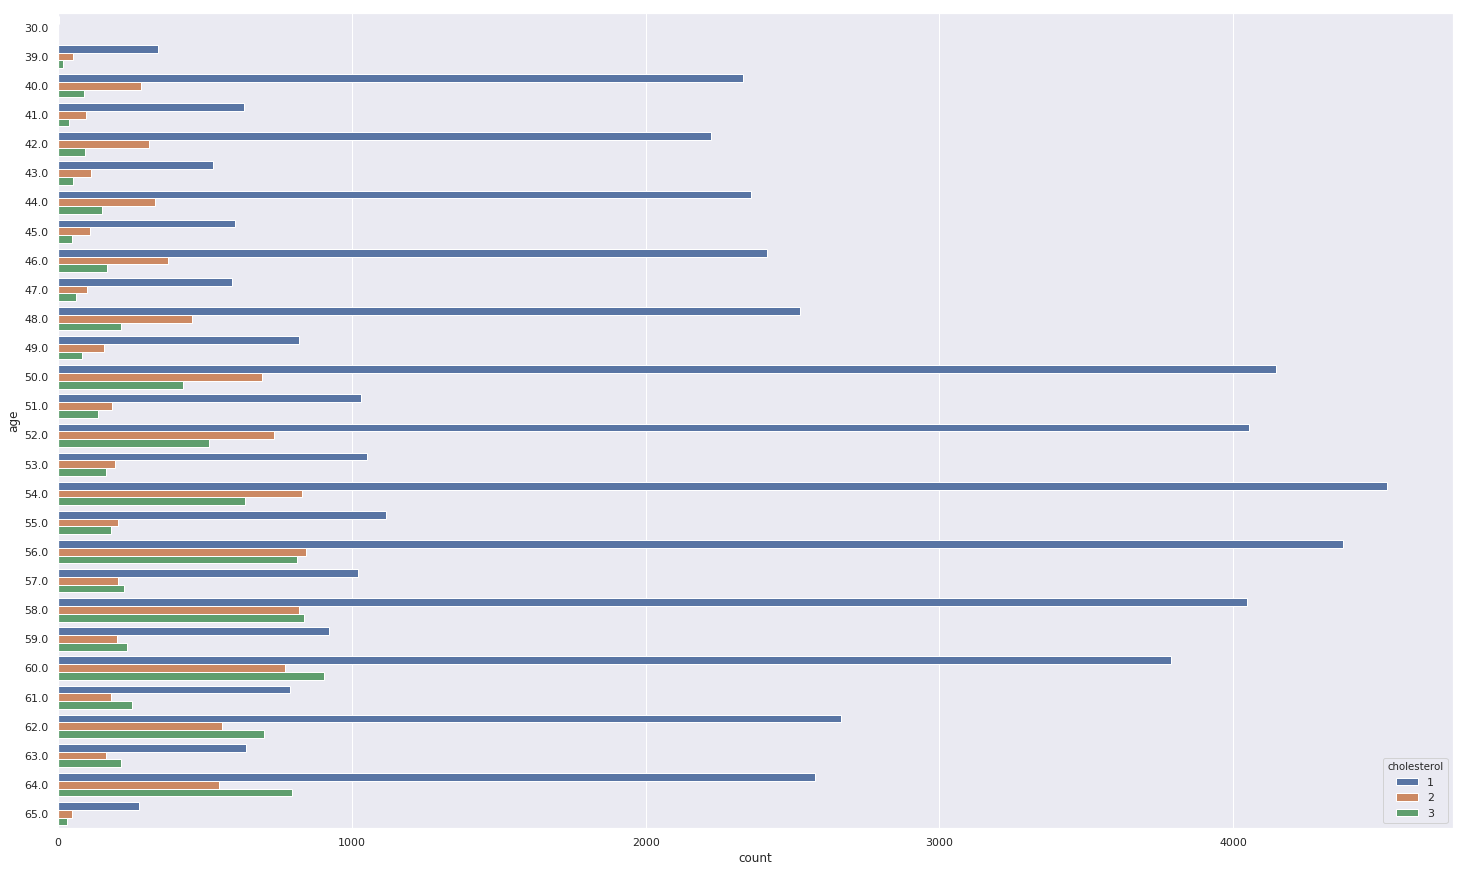

In [15]:
# 8. Визуализируйте распределение уровня холестерина для различных возрастных категорий.
plt.figure(figsize=(25, 15))
sns.countplot(y='age', hue='cholesterol', data=df);

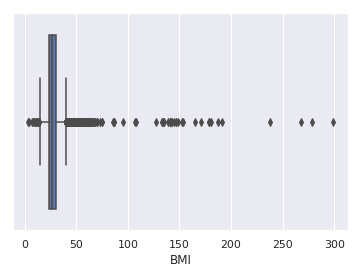

In [16]:
# 9. Как распределена переменная BMI? Есть ли выбросы
sns.boxplot(df['BMI']);
# Достаточно много выбросов нетипичных для данной выборки значений

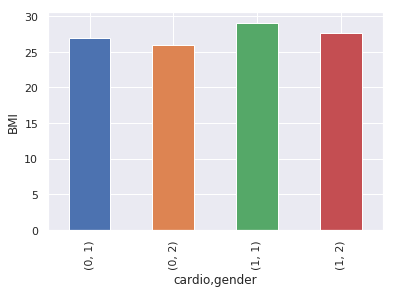

In [17]:
# 10. Как соотносятся ИМТ и наличие ССЗ? Придумайте подходящую визуализацию.
df.groupby(['cardio', 'gender'])['BMI'].mean().plot(kind='bar') 
plt.ylabel('BMI') 
plt.show();
# В среднем средний BMI ближе к норме у людей без ССЗ.